In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_excel("C:\\Users\\acer\\Downloads\\Random Forest\\Random Forest\\glass.xlsx", sheet_name="glass")

In [6]:
print("Dataset Head:\n", df.head())
print("\nDataset Info:\n")
df.info()
print("\nMissing Values:\n", df.isnull().sum())

Dataset Head:
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
m

In [7]:
numeric_df = df.select_dtypes(include=[np.number])

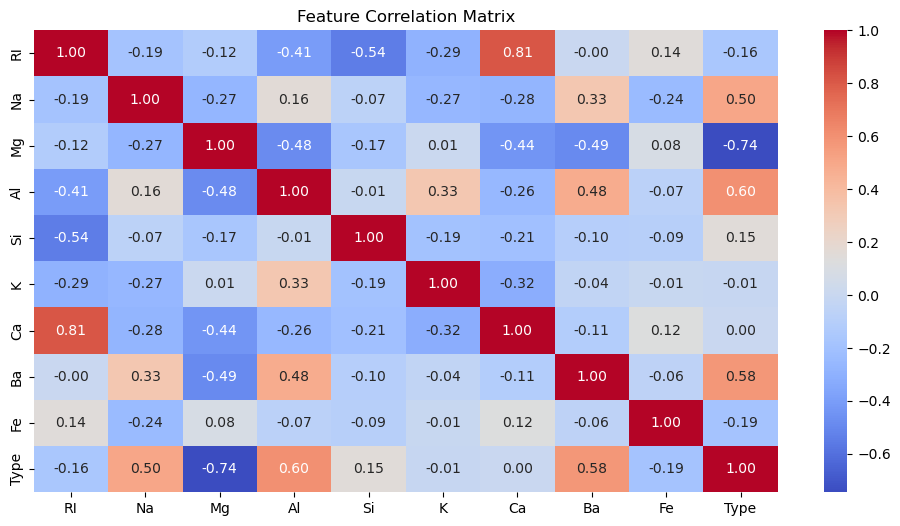

In [8]:
if not numeric_df.empty:
    plt.figure(figsize=(12, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Feature Correlation Matrix")
    plt.show()
else:
    print("No numerical features available for correlation matrix.")

<Figure size 1200x800 with 0 Axes>

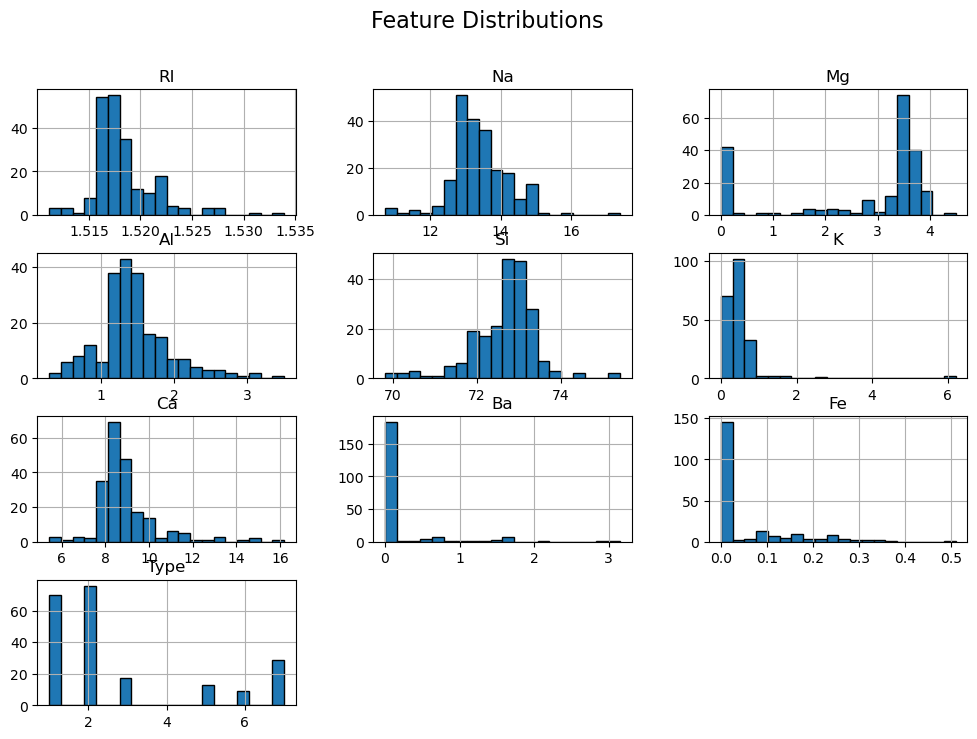

In [9]:
if not numeric_df.empty:
    plt.figure(figsize=(12, 8))
    numeric_df.hist(bins=20, figsize=(12, 8), edgecolor='black')
    plt.suptitle("Feature Distributions", fontsize=16)
    plt.show()
else:
    print("No numerical features available for histograms.")

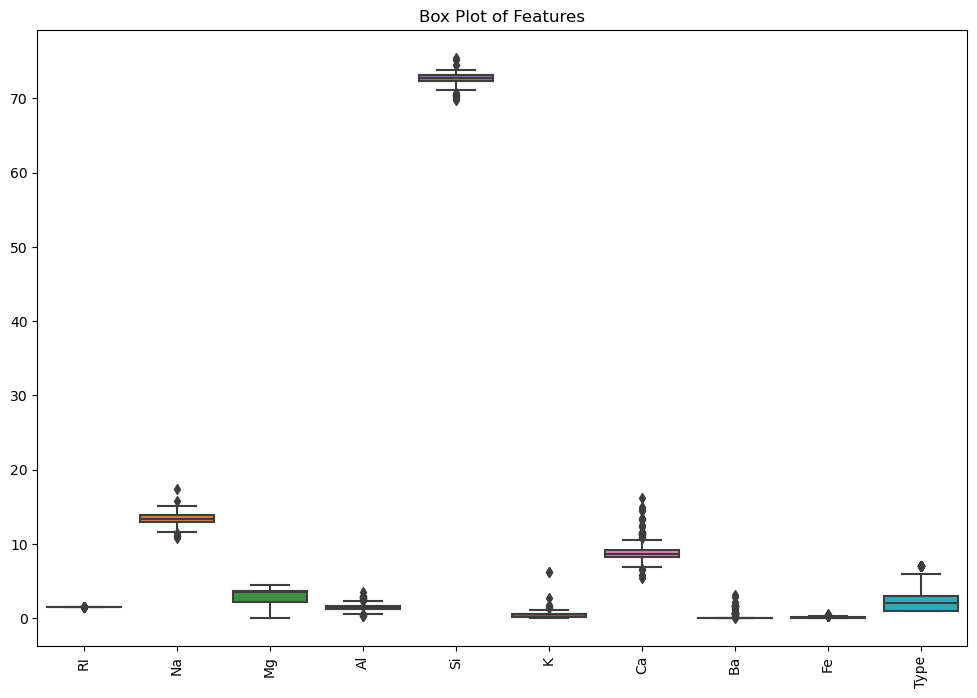

In [10]:
if not numeric_df.empty:
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=numeric_df)
    plt.xticks(rotation=90)
    plt.title("Box Plot of Features")
    plt.show()
else:
    print("No numerical features available for box plots.")

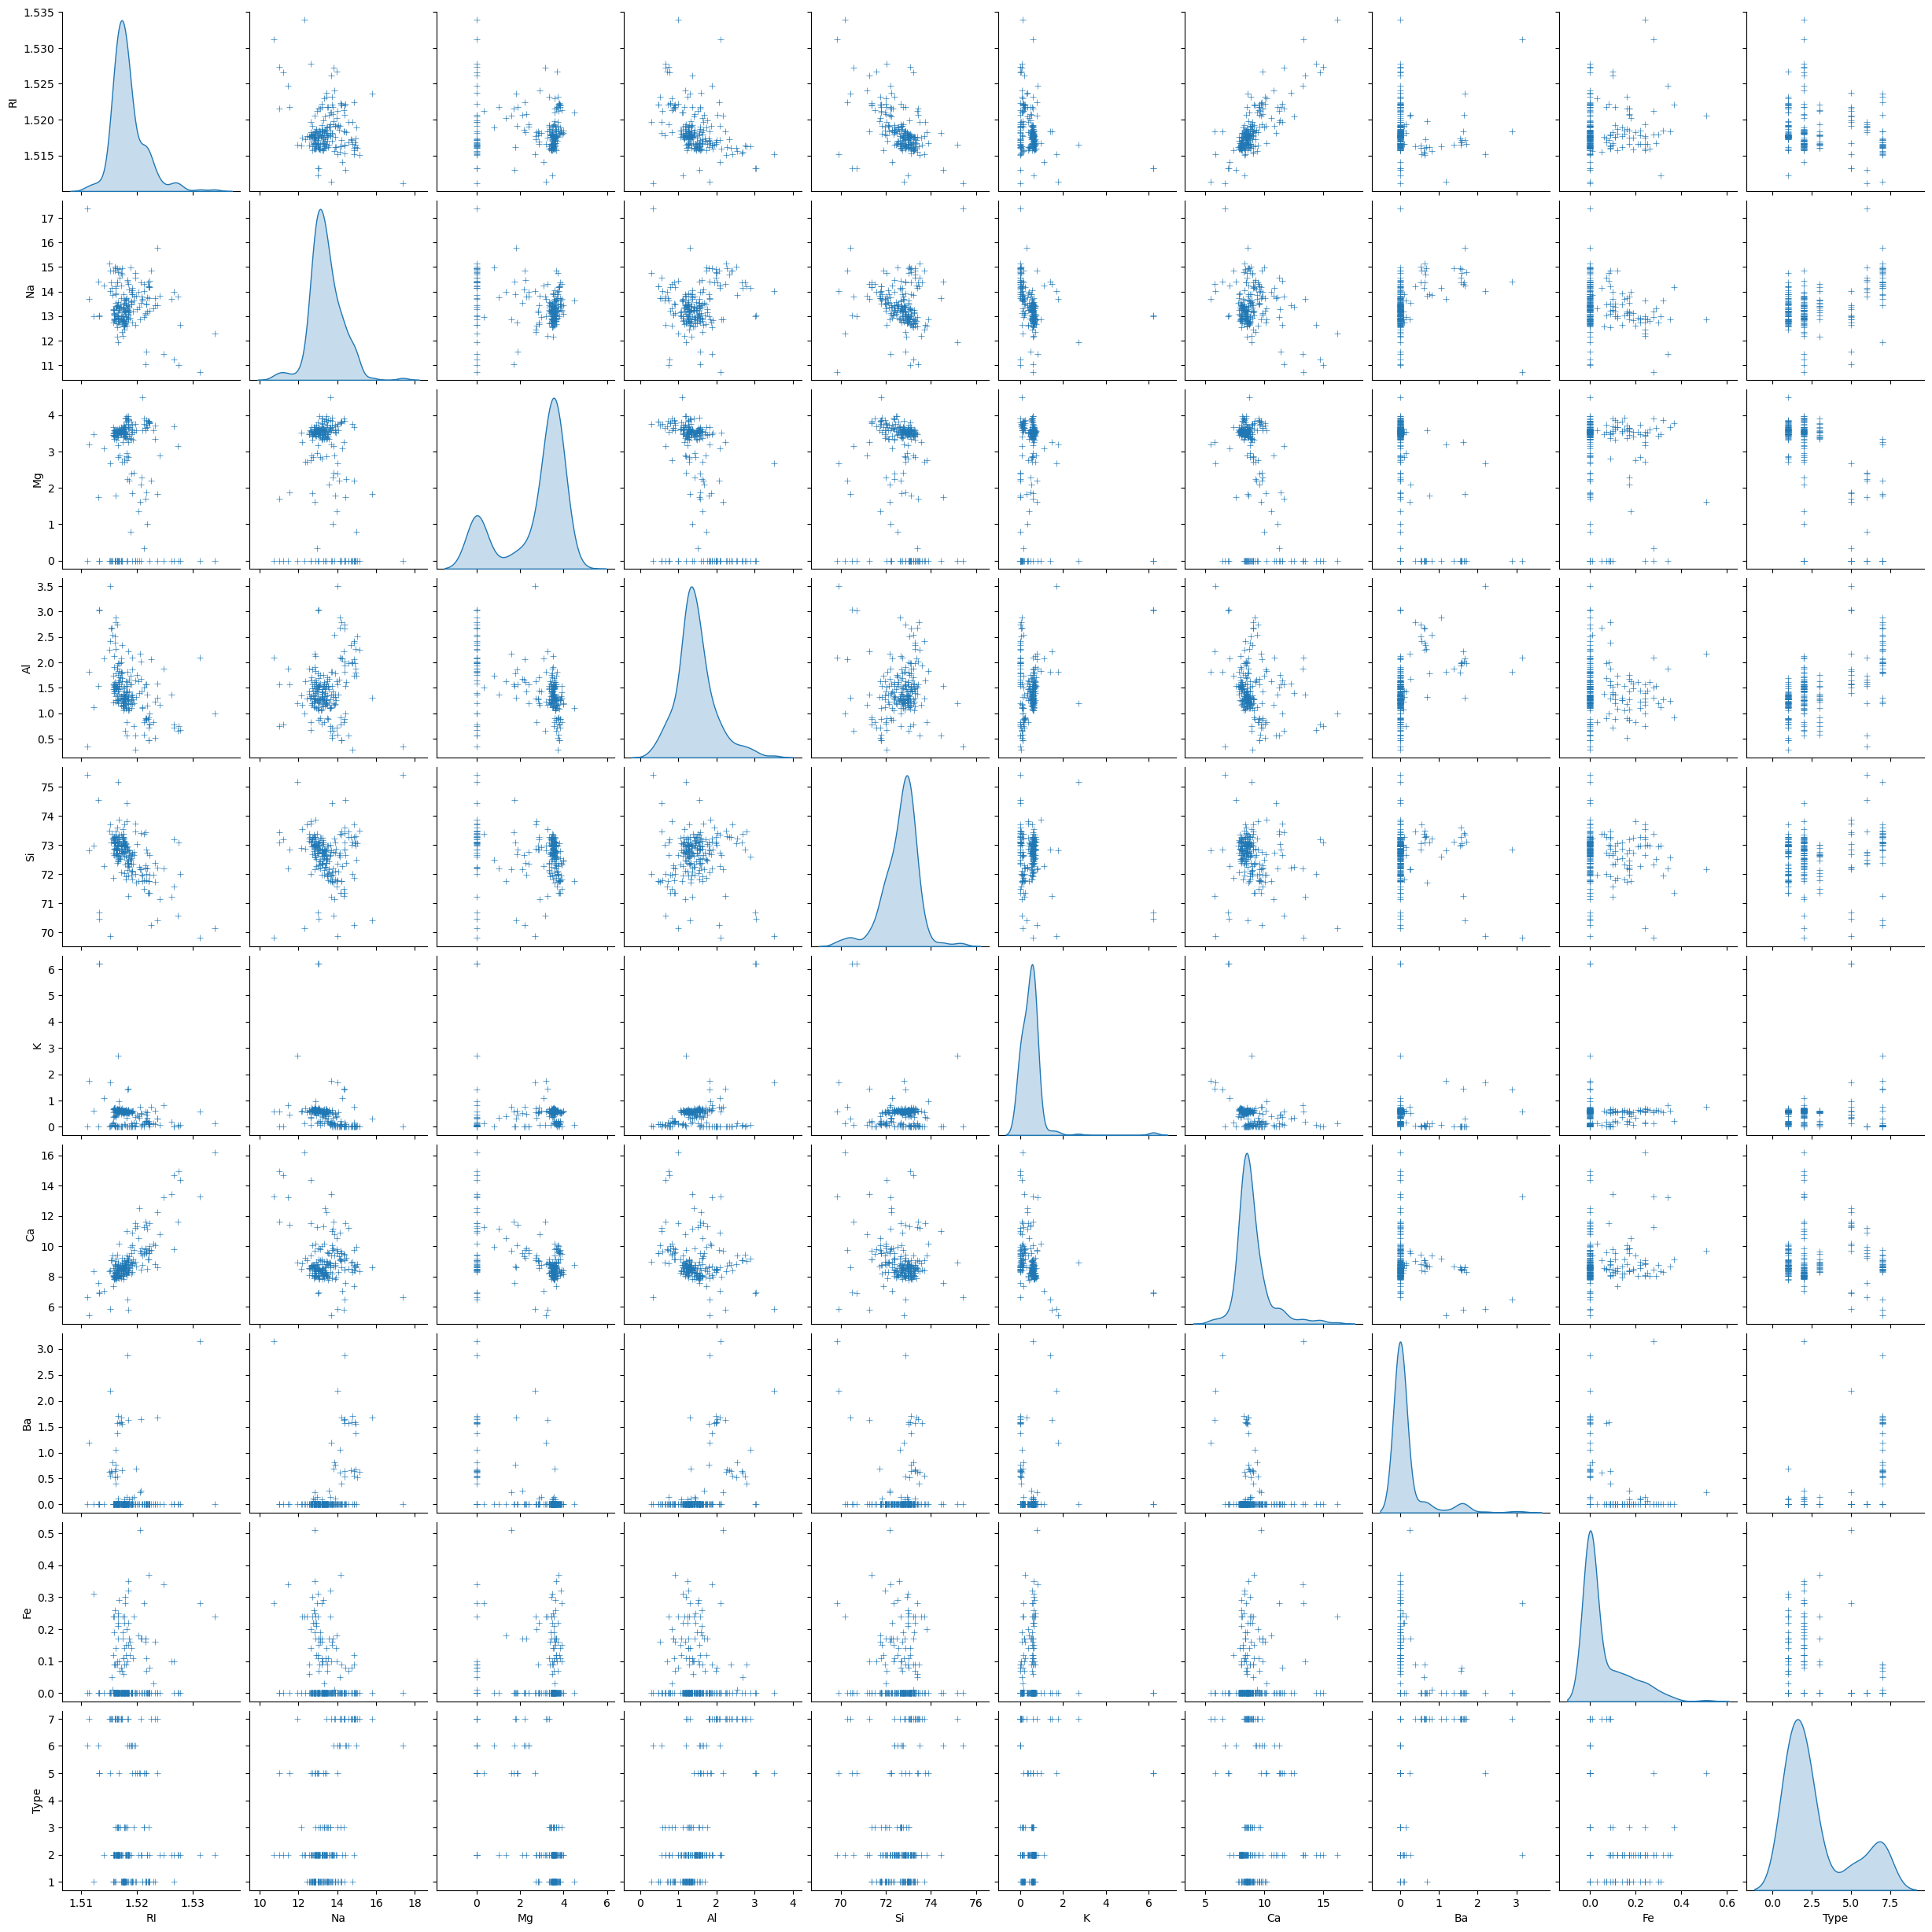

In [11]:
if not numeric_df.empty:
    sns.pairplot(numeric_df, diag_kind='kde', markers='+')
    plt.show()
else:
    print("No numerical features available for pair plots.")

In [12]:
if 'Type' in df.columns and df['Type'].dtype == 'O':
    le = LabelEncoder()
    df['Type'] = le.fit_transform(df['Type'])

In [13]:
X = df.drop(columns=['Type']) if 'Type' in df.columns else df
y = df['Type'] if 'Type' in df.columns else None

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

In [16]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [17]:
clf = grid_search.best_estimator_
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=42)

In [18]:
y_pred = clf.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8372093023255814
Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.91      0.83        11
           2       0.79      0.79      0.79        14
           3       1.00      0.67      0.80         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.81      0.84        43
weighted avg       0.85      0.84      0.83        43



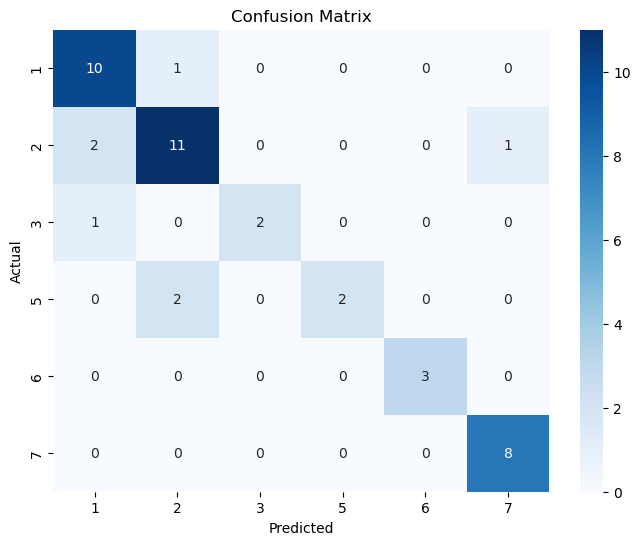

In [20]:
onf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()